In [1]:
# Librerias necesarias
import cv2
import math
import time
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as ss
from numpy import linalg as LA
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.morphology import remove_small_holes, erosion, square
warnings.filterwarnings("ignore")

In [2]:
def sacar_imagen_canal(imagen, canal):
    matriz = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            fila.append(np.uint8(imagen[i][j][canal]))
        fila = np.array(fila)
        matriz.append(fila)
    matriz = np.array(matriz)
    return matriz

In [3]:
def union_imagen(imagen_1, imagen_2, imagen_3):
    matriz = []
    for i in range(len(imagen_1)):
        fila = []
        for j in range(len(imagen_1[0])):
            fila.append([imagen_1[i][j], imagen_2[i][j], imagen_3[i][j]])
        matriz.append(fila)
    return matriz

In [4]:
def transformacion_imagen(imagen, ruido):
    nueva_imagen = []
    for i in range(len(imagen)):
        lista = []
        for j in range(len(imagen[0])):
            R = max(min(int(imagen[i][j][0] + ruido[i][j][0]),255), 0)
            G = max(min(int(imagen[i][j][1] + ruido[i][j][1]),255), 0)
            B = max(min(int(imagen[i][j][2] + ruido[i][j][2]),255), 0)
            lista.append([R,G,B])
        nueva_imagen.append(lista)
    return nueva_imagen

In [5]:
def maxima_intensidad_imagen(imagen):
    lista = []
    for i in range(len(imagen)):
        for j in range(len(imagen[0])):
            lista.append(imagen[i][j][0])
            lista.append(imagen[i][j][1])
            lista.append(imagen[i][j][2])
    maximo = max(lista)
    return maximo

In [6]:
def muestreo_normal(porcentaje, imagen):
    maxima_intensidad = maxima_intensidad_imagen(imagen)
    sigma = porcentaje*maxima_intensidad
    total_datos = len(imagen)*len(imagen[0])
    muestreo_1 = np.random.normal(0, sigma, total_datos)
    muestreo_2 = np.random.normal(0, sigma, total_datos)
    muestreo_3 = np.random.normal(0, sigma, total_datos)
    ruido = []
    alto = len(imagen)
    ancho = len(imagen[0])
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista.append([muestreo_1[j + i*ancho], muestreo_2[j + i*ancho], muestreo_3[j + i*ancho]])
        ruido.append(lista)
    return ruido

In [7]:
def imagen_para_aplicar_filtro(imagen):
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto+4):
        lista = []
        for j in range(ancho+4):
            if i == 0 or i == 1 or i == alto + 3 or i == alto + 2 or j == 0 or j == 1 or j == ancho + 3 or j == ancho + 2:
                lista.append([0, 0, 0])
            else:
                lista.append([imagen[i-2][j-2][0], imagen[i-2][j-2][1], imagen[i-2][j-2][2]]) 
        matriz.append(lista)
    return matriz

In [8]:
def filtro_media(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista_R = []
            lista_R.append(imagen_filtro[i+1][j+1][0])
            lista_R.append(imagen_filtro[i+1][j+2][0])
            lista_R.append(imagen_filtro[i+1][j+3][0])
            lista_R.append(imagen_filtro[i+2][j+1][0])
            lista_R.append(imagen_filtro[i+2][j+2][0])
            lista_R.append(imagen_filtro[i+2][j+3][0])
            lista_R.append(imagen_filtro[i+3][j+1][0])
            lista_R.append(imagen_filtro[i+3][j+2][0])
            lista_R.append(imagen_filtro[i+3][j+3][0])
            lista_G = []
            lista_G.append(imagen_filtro[i+1][j+1][1])
            lista_G.append(imagen_filtro[i+1][j+2][1])
            lista_G.append(imagen_filtro[i+1][j+3][1])
            lista_G.append(imagen_filtro[i+2][j+1][1])
            lista_G.append(imagen_filtro[i+2][j+2][1])
            lista_G.append(imagen_filtro[i+2][j+3][1])
            lista_G.append(imagen_filtro[i+3][j+1][1])
            lista_G.append(imagen_filtro[i+3][j+2][1])
            lista_G.append(imagen_filtro[i+3][j+3][1])
            lista_B = []
            lista_B.append(imagen_filtro[i+1][j+1][2])
            lista_B.append(imagen_filtro[i+1][j+2][2])
            lista_B.append(imagen_filtro[i+1][j+3][2])
            lista_B.append(imagen_filtro[i+2][j+1][2])
            lista_B.append(imagen_filtro[i+2][j+2][2])
            lista_B.append(imagen_filtro[i+2][j+3][2])
            lista_B.append(imagen_filtro[i+3][j+1][2])
            lista_B.append(imagen_filtro[i+3][j+2][2])
            lista_B.append(imagen_filtro[i+3][j+3][2])
            lista.append([int(np.mean(lista_R)), int(np.mean(lista_G)), int(np.mean(lista_B))])
        matriz.append(lista)    
    return matriz

In [9]:
def filtro_mediana(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista_R = []
            lista_R.append(imagen_filtro[i+1][j+1][0])
            lista_R.append(imagen_filtro[i+1][j+2][0])
            lista_R.append(imagen_filtro[i+1][j+3][0])
            lista_R.append(imagen_filtro[i+2][j+1][0])
            lista_R.append(imagen_filtro[i+2][j+2][0])
            lista_R.append(imagen_filtro[i+2][j+3][0])
            lista_R.append(imagen_filtro[i+3][j+1][0])
            lista_R.append(imagen_filtro[i+3][j+2][0])
            lista_R.append(imagen_filtro[i+3][j+3][0])
            lista_G = []
            lista_G.append(imagen_filtro[i+1][j+1][1])
            lista_G.append(imagen_filtro[i+1][j+2][1])
            lista_G.append(imagen_filtro[i+1][j+3][1])
            lista_G.append(imagen_filtro[i+2][j+1][1])
            lista_G.append(imagen_filtro[i+2][j+2][1])
            lista_G.append(imagen_filtro[i+2][j+3][1])
            lista_G.append(imagen_filtro[i+3][j+1][1])
            lista_G.append(imagen_filtro[i+3][j+2][1])
            lista_G.append(imagen_filtro[i+3][j+3][1])
            lista_B = []
            lista_B.append(imagen_filtro[i+1][j+1][2])
            lista_B.append(imagen_filtro[i+1][j+2][2])
            lista_B.append(imagen_filtro[i+1][j+3][2])
            lista_B.append(imagen_filtro[i+2][j+1][2])
            lista_B.append(imagen_filtro[i+2][j+2][2])
            lista_B.append(imagen_filtro[i+2][j+3][2])
            lista_B.append(imagen_filtro[i+3][j+1][2])
            lista_B.append(imagen_filtro[i+3][j+2][2])
            lista_B.append(imagen_filtro[i+3][j+3][2])
            lista.append([int(np.median(lista_R)), int(np.median(lista_G)), int(np.median(lista_B))])
        matriz.append(lista)    
    return matriz

In [10]:
def filtro_gamma(imagen, gamma):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            lista = []
            lista.append(min(max(int(255*((imagen[i][j][0]/255)**gamma)),0), 255))
            lista.append(min(max(int(255*((imagen[i][j][1]/255)**gamma)),0), 255))
            lista.append(min(max(int(255*((imagen[i][j][2]/255)**gamma)),0), 255))
            fila.append(lista)
        nueva_imagen.append(fila)
    return nueva_imagen

In [11]:
def pasa_altos_gaussiano(espectro, D_0):
    largo = len(espectro)
    ancho = len(espectro[0])
    vertice_central = np.array([int(largo/2), int(ancho/2)])
    
    nuevo_espectro = []
    
    for i in range(largo):
        fila = []
        for j in range(ancho):
            vertice = np.array([i+1, j+1])
            distancia = np.linalg.norm(vertice-vertice_central)
            exponente = - (distancia**2)/(2*(D_0**2))
            factor = 1 - math.exp(exponente)
            nuevo_elemento = factor*espectro[i][j]
            fila.append(nuevo_elemento)         
        nuevo_espectro.append(fila)

    return nuevo_espectro

In [12]:
def binarizacion_imagen(imagen, tolerancia):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            cantidad = np.linalg.norm(imagen[i][j])
            if cantidad > tolerancia:
                fila.append([255, 255, 255])
            else:
                fila.append([0, 0, 0])
        nueva_imagen.append(fila)
    return nueva_imagen

In [13]:
def identificar_objeto(altura_1, altura_2, ancho_1, ancho_2, imagen_binaria):
    resultados = []
    for i in range(altura_1, altura_2 + 1):
        lista = []
        for j in range(ancho_1, ancho_2 + 1):    
            if imagen_binaria[i][j][0] == 255:
                lista.append(j)
        resultados.append([i, [min(lista), max(lista)]])
    
    lista_1 = []
    lista_2 = []
    for k in resultados:
        lista_1.append(k[0])
        lista_2.append(k[1])
        
    return [lista_1, lista_2]

In [14]:
def sacar_objeto(imagen, listado):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            if i in listado[0]:
                indice = listado[0].index(i)
                if listado[1][indice][0] <= j <= listado[1][indice][1]:
                    fila.append([255, 255, 255])
                else:
                    fila.append(imagen[i][j])
            else:
                fila.append(imagen[i][j])
        nueva_imagen.append(fila)
    return nueva_imagen

In [15]:
def solo_objeto(imagen, listado):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            if i in listado[0]:
                indice = listado[0].index(i)
                if listado[1][indice][0] <= j <= listado[1][indice][1]:
                    fila.append(imagen[i][j])
                else:
                    fila.append([255, 255, 255])
            else:
                fila.append([255, 255, 255])
        nueva_imagen.append(fila)
    return nueva_imagen

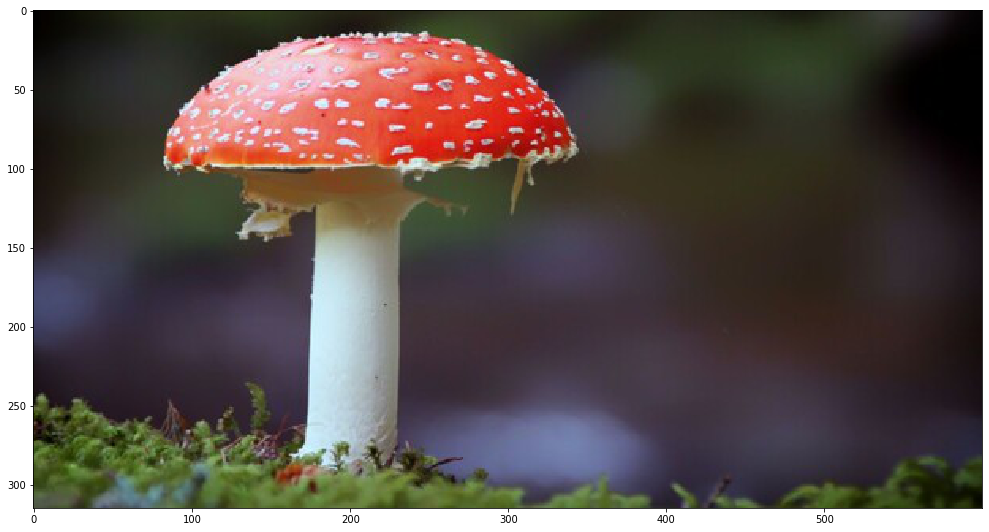

In [16]:
# CARGAR IMAGEN

fig, ax = plt.subplots(figsize=(17,10))
nombre = 'hongos.jpg'
imagen = plt.imread(nombre)
plt.imshow(imagen)

In [17]:
gamma = 0.8
imagen_bajo_contraste = filtro_gamma(imagen, gamma)
porcentaje = 0.05
ruido = muestreo_normal(porcentaje, imagen_bajo_contraste)
imagen_con_ruido_bajo = transformacion_imagen(imagen_bajo_contraste, ruido)

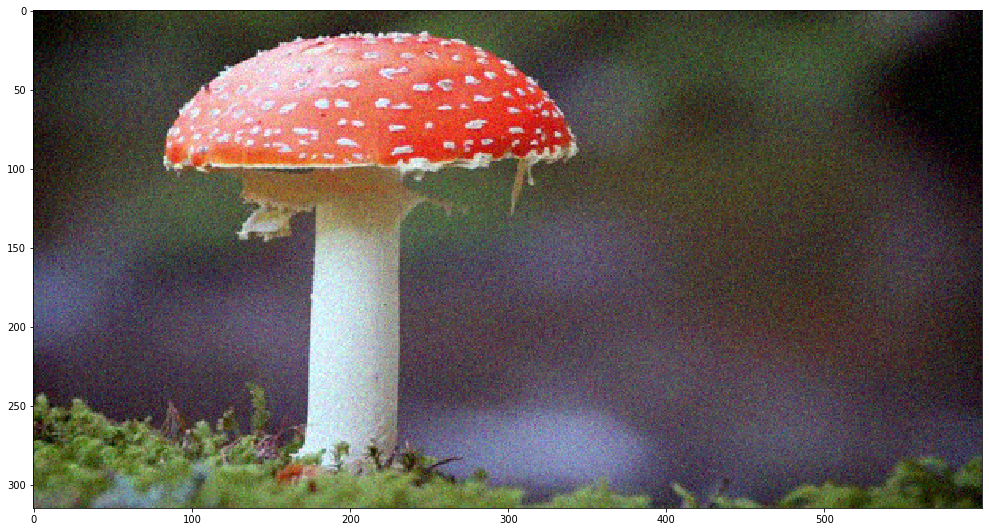

In [18]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_con_ruido_bajo)

In [19]:
filtro_media_imagen = filtro_media(imagen_con_ruido_bajo)
gamma = 1.4
imagen_trabajar = filtro_gamma(filtro_media_imagen, gamma)

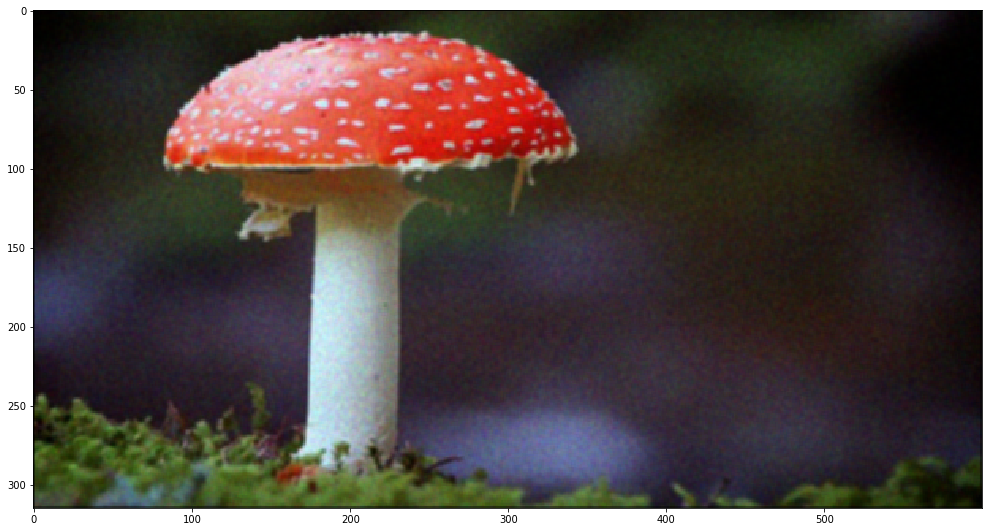

In [20]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_trabajar)

In [21]:
imagen_trabajar_rojo = sacar_imagen_canal(imagen_trabajar, 0)
imagen_trabajar_verde = sacar_imagen_canal(imagen_trabajar, 1)
imagen_trabajar_azul = sacar_imagen_canal(imagen_trabajar, 2)

f_rojo = np.fft.fft2(imagen_trabajar_rojo)
f_verde = np.fft.fft2(imagen_trabajar_verde)
f_azul = np.fft.fft2(imagen_trabajar_azul)

fshift_rojo = np.fft.fftshift(f_rojo)
fshift_verde = np.fft.fftshift(f_verde)
fshift_azul = np.fft.fftshift(f_azul)

magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo))
magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde))
magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul))

In [22]:
D_0 = 30

fshift_rojo_modificado = pasa_altos_gaussiano(fshift_rojo, D_0)
fshift_verde_modificado = pasa_altos_gaussiano(fshift_verde, D_0)
fshift_azul_modificado = pasa_altos_gaussiano(fshift_azul, D_0)

nueva_magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo_modificado))
nueva_magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde_modificado))
nueva_magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul_modificado))

In [23]:
f_ishift_rojo_modificado = np.fft.ifftshift(fshift_rojo_modificado)
img_back_rojo_modificado = np.fft.ifft2(f_ishift_rojo_modificado)
img_back_rojo_modificado = np.uint8(np.abs(img_back_rojo_modificado))

f_ishift_verde_modificado = np.fft.ifftshift(fshift_verde_modificado)
img_back_verde_modificado = np.fft.ifft2(f_ishift_verde_modificado)
img_back_verde_modificado = np.uint8(np.abs(img_back_verde_modificado))

f_ishift_azul_modificado = np.fft.ifftshift(fshift_azul_modificado)
img_back_azul_modificado = np.fft.ifft2(f_ishift_azul_modificado)
img_back_azul_modificado = np.uint8(np.abs(img_back_azul_modificado))

imagen_filtro_gaussiano = union_imagen(img_back_rojo_modificado, img_back_verde_modificado, img_back_azul_modificado)

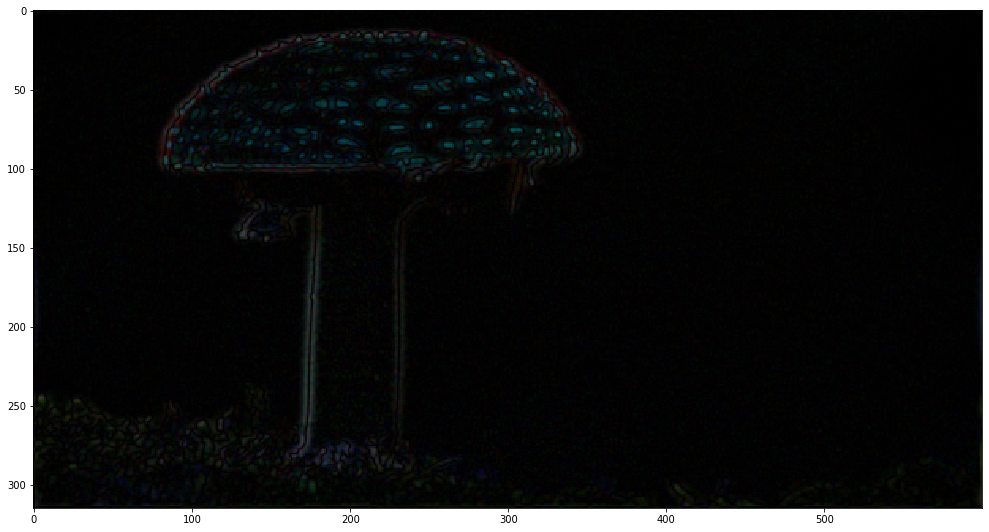

In [24]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_filtro_gaussiano)

In [25]:
tolerancia = 18
imagen_binaria = binarizacion_imagen(imagen_filtro_gaussiano, tolerancia)

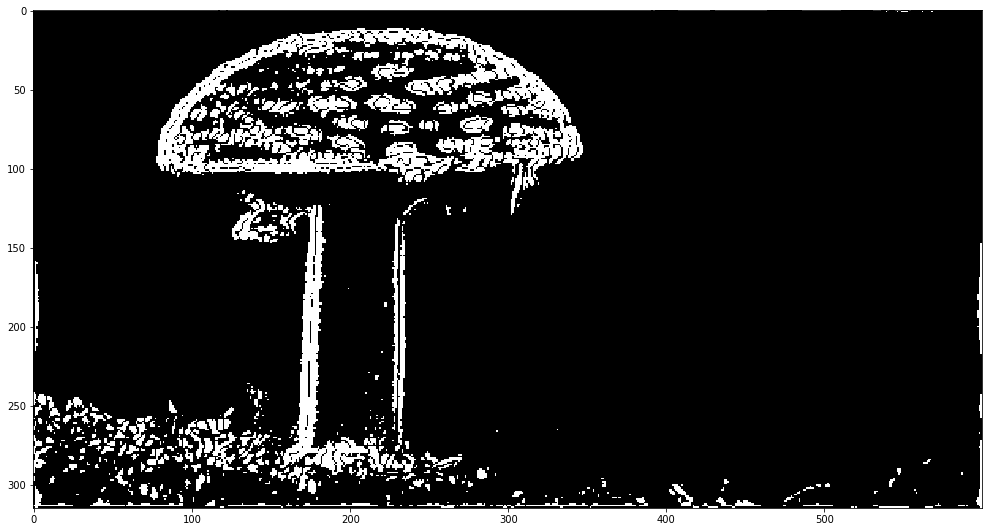

In [26]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [27]:
iteraciones = 1
tolerancia = 18

for i in range(iteraciones):
    start = time.time()
    imagen_binaria = filtro_media(imagen_binaria)
    imagen_binaria = binarizacion_imagen(imagen_binaria, tolerancia)
    end = time.time()
    print("En la iteracion {0} se demoro {1}".format(i, end-start))

En la iteracion 0 se demoro 20.51220989227295


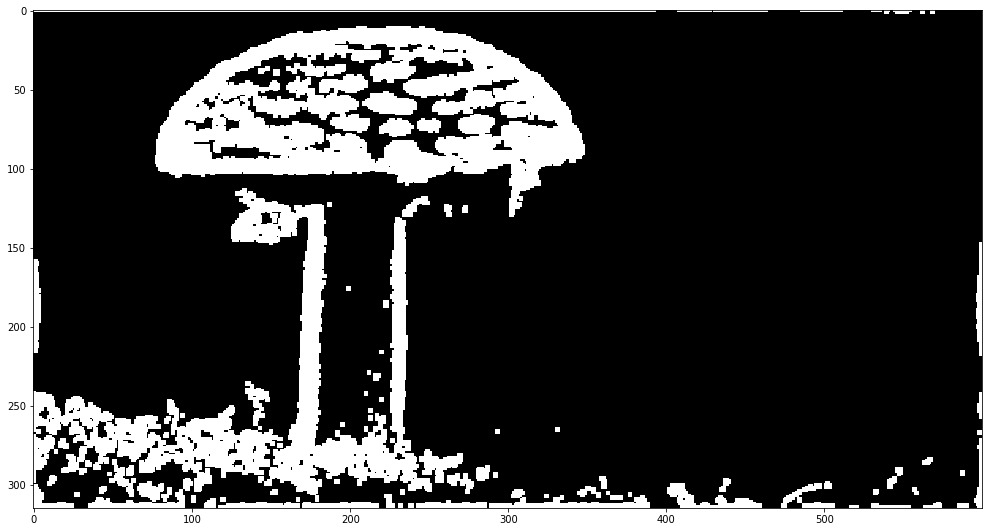

In [28]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [29]:
identificacion = identificar_objeto(11, 105, 50, 400, imagen_binaria)
imagen_sacada = sacar_objeto(imagen_trabajar, identificacion)

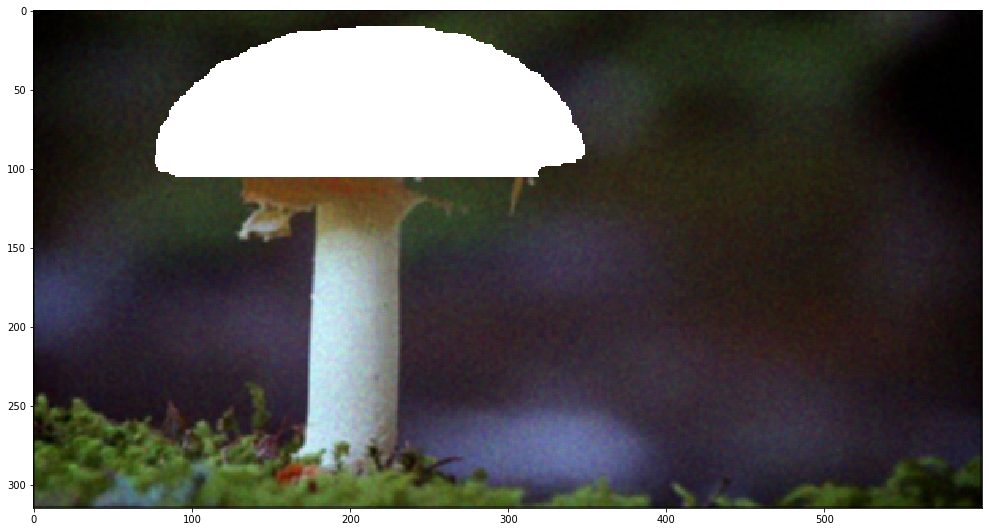

In [30]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sacada)

In [31]:
imagen_sola = solo_objeto(imagen_trabajar, identificacion)

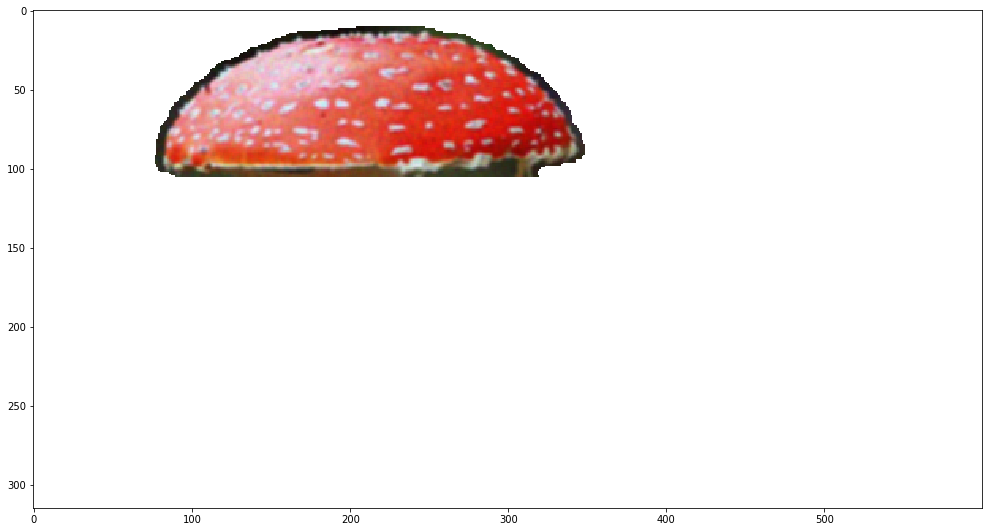

In [32]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sola)

In [33]:
def imagen_numerica(imagen):
    nueva_imagen = []
    puntos = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            if imagen[i][j] == [255, 255, 255]:
                fila.append([255, 255, 255])
                puntos.append([i, j])
            else:
                fila.append([0, 0, 0])
        nueva_imagen.append(fila)
    
    return [nueva_imagen, puntos]

In [34]:
matriz_numeros = imagen_numerica(imagen_sacada)[0]
puntos = imagen_numerica(imagen_sacada)[1]  #Puntos son todos los puntos en blanco

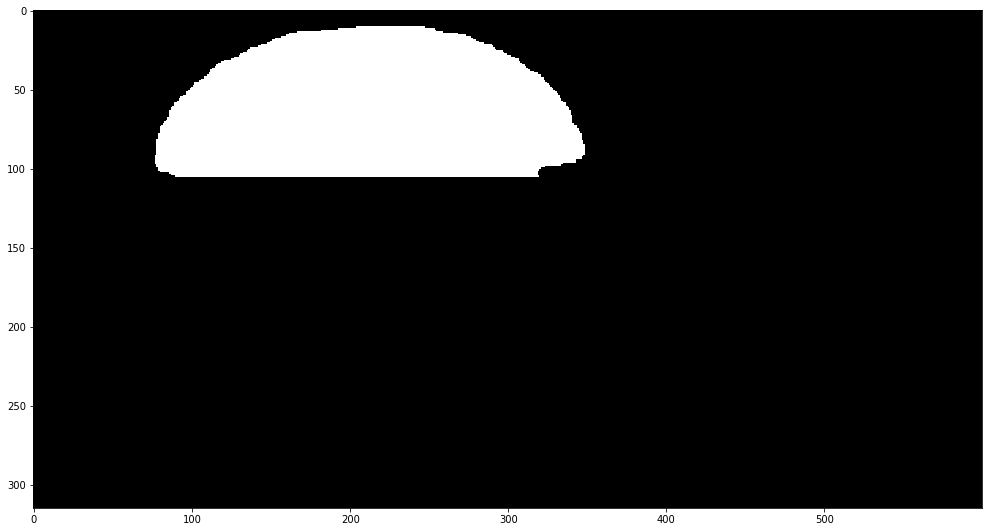

In [35]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(matriz_numeros)

In [36]:
def sacar_puntos_candidatos(matriz_numerica, radio, puntos):
    
    nuevos_puntos = []
    
    lista_1 = []
    lista_2 = []

    for k in puntos:
        lista_1.append(k[0])
        lista_2.append(k[1])

    minimo_ancho = max(min(lista_1) - radio, 0)
    maximo_ancho = min(max(lista_1) + radio, len(matriz_numerica))
    minimo_largo = max(min(lista_2) - radio, 0)
    maximo_largo = min(max(lista_2) + radio, len(matriz_numerica[0]))
    
    for i in range(minimo_ancho, maximo_ancho+1):
        for j in range(minimo_largo, maximo_largo+1):
            if matriz_numerica[i][j] != [255, 255, 255]:
                nuevos_puntos.append([i, j])
    
    return [nuevos_puntos]

In [37]:
# nuevos_puntos[0] son los puntos alrededor de la figura
nuevos_puntos  = sacar_puntos_candidatos(matriz_numeros, 10, puntos)

In [38]:
puntos_1 = nuevos_puntos[0]   #Puntos alrededor de la figura
puntos_2 = puntos   #Puntos dentro de la figura

In [39]:
def elementos_mas_cercanos(puntos_1, puntos_2, radio):
    lista_final = []
    for i in range(len(puntos_1)):
        if (i % 1000) == 0:
            print(i)
        k = puntos_1[i]
        lista_distancia = []
        candidatos = []
        for h in puntos_2:
            lista_distancia.append(((h[0] - k[0])**2 + (h[1]-k[1])**2)**(1/2))
            candidatos.append(h)
        minima_distancia = min(lista_distancia)
        if minima_distancia <= radio:
            indice = lista_distancia.index(minima_distancia)
            lista_final.append([k, candidatos[indice]])
    return lista_final

In [40]:
start = time.time()

elementos_cercanos = elementos_mas_cercanos(puntos_1, puntos_2, 10)

end = time.time()

print(end-start)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
720.9253647327423


In [41]:
elementos_cercanos[0]

[[1, 204], [11, 204]]

In [42]:
puntos_borde = []

for i in range(len(elementos_cercanos)):
    puntos_borde.append(elementos_cercanos[i][1])

In [43]:
puntos_espejo = []

for i in range(len(elementos_cercanos)):
   
    d_1 = elementos_cercanos[i][1][0] - elementos_cercanos[i][0][0]
    x_1 = d_1 + elementos_cercanos[i][1][0]
    
    d_2 = elementos_cercanos[i][1][1] - elementos_cercanos[i][0][1]
    x_2 = d_2 + elementos_cercanos[i][1][1]
    
    puntos_espejo.append([elementos_cercanos[i][0], [x_1, x_2]])

In [44]:
puntos_asignados = []

for i in range(len(puntos_espejo)):
    puntos_asignados.append(puntos_espejo[i][1])

In [45]:
puntos_asociados = []

for i in range(len(puntos_asignados)):
    lista = []
    for k in range(len(puntos_espejo)):
        if puntos_espejo[k][1] == puntos_asignados[i]:
            lista.append(puntos_espejo[k][0])
    puntos_asociados.append([puntos_asignados[i], lista])

In [46]:
elementos_gris = []

for i in range(len(elementos_cercanos)):
    elementos_gris.append(elementos_cercanos[i][0])

In [47]:
def sacar_matriz_anillo(matriz_numeros, elementos_gris):
    nueva_matriz = []
    for i in range(len(matriz_numeros)):
        fila = []
        for j in range(len(matriz_numeros[0])):
            if [i, j] in elementos_gris:
                fila.append([122, 122, 122])
            else:
                fila.append(matriz_numeros[i][j])
        nueva_matriz.append(fila)
    return nueva_matriz 

In [48]:
matriz_anillo = sacar_matriz_anillo(matriz_numeros, elementos_gris)

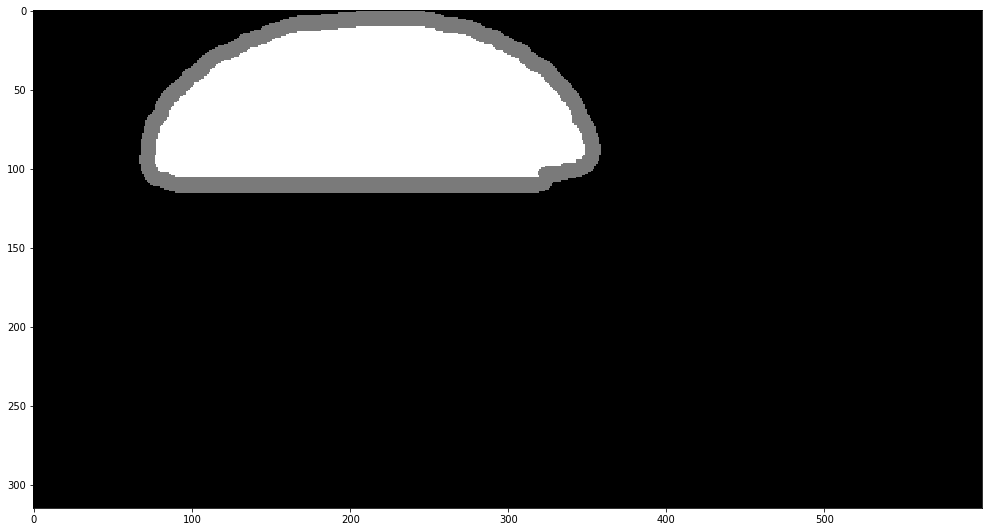

In [49]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(matriz_anillo)

In [50]:
def sacar_elementos_mas_anillo(imagen_trabajar, matriz_anillo):
    nueva_imagen = []
    for i in range(len(imagen_trabajar)):
        fila = []
        for j in range(len(imagen_trabajar[0])):
            if matriz_anillo[i][j] == [122, 122, 122] or matriz_anillo[i][j] == [255, 255, 255]:
                fila.append(imagen_trabajar[i][j])
            else:
                fila.append([255, 255, 255])
        nueva_imagen.append(fila)
    return nueva_imagen

In [51]:
imagen_mas_anillo = sacar_elementos_mas_anillo(imagen_trabajar, matriz_anillo)

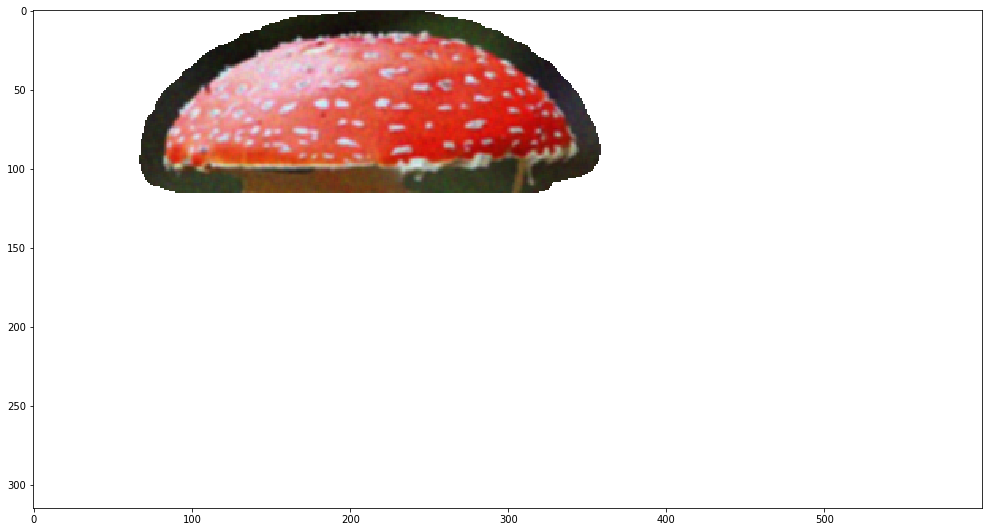

In [52]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_mas_anillo)

In [53]:
puntos_dentro = []

for i in range(len(puntos_asociados)):
    puntos_dentro.append(puntos_asociados[i][0])

In [54]:
def imagen_espejo(imagen_trabajar, puntos_asociados, puntos_dentro):
    puntos_ya_asignados = []
    nueva_imagen = []
    for i in range(len(imagen_trabajar)):
        fila = []
        for j in range(len(imagen_trabajar[0])):
            if [i, j] in puntos_dentro:
                indice = puntos_dentro.index([i, j])
                agrega = [0, 0, 0]
                for k in range(len(puntos_asociados[indice][1])):
                    x_1 = puntos_asociados[indice][1][k][0]
                    x_2 = puntos_asociados[indice][1][k][1]
                    agrega[0] = agrega[0] + imagen_trabajar[x_1][x_2][0]
                    agrega[1] = agrega[1] + imagen_trabajar[x_1][x_2][1]
                    agrega[2] = agrega[2] + imagen_trabajar[x_1][x_2][2]
                
                agrega[0] = int(agrega[0]/len(puntos_asociados[indice][1]))
                agrega[1] = int(agrega[1]/len(puntos_asociados[indice][1]))
                agrega[2] = int(agrega[2]/len(puntos_asociados[indice][1]))
                fila.append(agrega)
                
                puntos_ya_asignados.append([i, j])
            
            else:
                fila.append(imagen_trabajar[i][j])
        
        nueva_imagen.append(fila)
    return [nueva_imagen, puntos_ya_asignados]

In [55]:
output = imagen_espejo(imagen_sacada, puntos_asociados, puntos_dentro)
espejo = output[0]
puntos_ya_asignados = output[1]

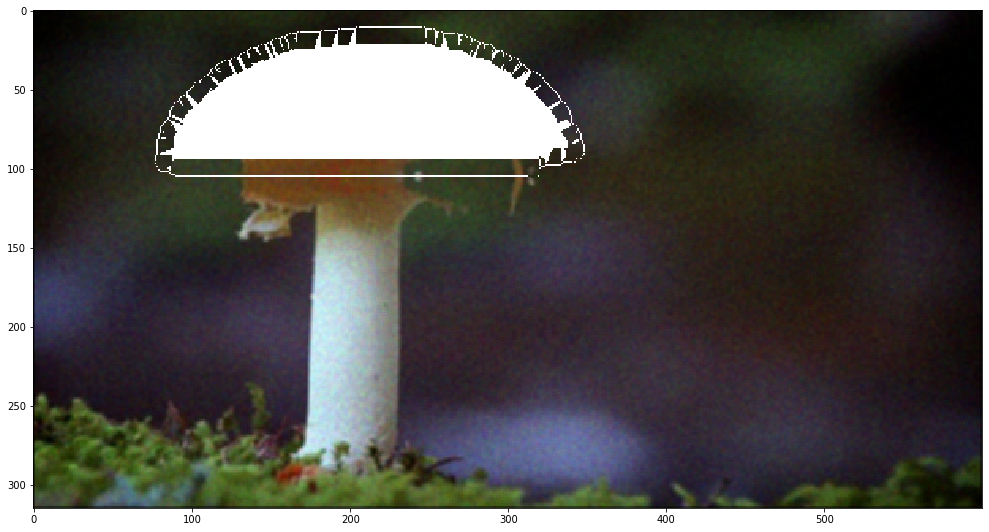

In [56]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(espejo)

In [57]:
anillo_interior = []
nuevo_radio = 10

for i in range(len(puntos_borde)):
    if i % 1000 == 0:
        print(i)
    for j in range(len(puntos)):
        distancia = ((puntos_borde[i][0] - puntos[j][0])**2 + (puntos_borde[i][1] - puntos[j][1])**2)**(1/2)
        if distancia <= nuevo_radio:
            if not(puntos[j] in anillo_interior):
                anillo_interior.append(puntos[j])

0
1000
2000
3000


KeyboardInterrupt: 

In [ ]:
puntos_aun_no_asignados = []

for i in range(len(anillo_interior)):
    if not(anillo_interior[i] in puntos_ya_asignados):
        puntos_aun_no_asignados.append(anillo_interior[i])

In [ ]:
puntos_no_asignados_mas_cerca_1 = []
puntos_no_asignados_mas_cerca_2 = []

for i in range(len(puntos_aun_no_asignados)):
    lista_posibles = []
    lista_distancia = []
    for j in range(len(puntos_ya_asignados)):
        lista_posibles.append(puntos_ya_asignados[j])
        parte_1 = (puntos_ya_asignados[j][0] - puntos_aun_no_asignados[i][0])**2
        parte_2 = (puntos_ya_asignados[j][1] - puntos_aun_no_asignados[i][1])**2
        distancia = (parte_1 + parte_2)**(1/2)
        lista_distancia.append(distancia)
    minima_distancia = min(lista_distancia)
    indice = lista_distancia.index(minima_distancia)
    mas_cerca = lista_posibles[indice]
    puntos_no_asignados_mas_cerca_1.append(puntos_aun_no_asignados[i])
    puntos_no_asignados_mas_cerca_2.append(mas_cerca)

In [ ]:
def espejo_final(espejo, puntos_no_asignados_mas_cerca_1, puntos_no_asignados_mas_cerca_2):
    nueva_imagen = []
    for i in range(len(espejo)):
        fila = []
        for j in range(len(espejo[0])):
            if [i, j] in puntos_no_asignados_mas_cerca_1:
                indice = puntos_no_asignados_mas_cerca_1.index([i, j])
                x_1 = puntos_no_asignados_mas_cerca_2[indice][0]
                x_2 = puntos_no_asignados_mas_cerca_2[indice][0]
                fila.append(espejo[x_1][x_2])
            else:
                fila.append(espejo[i][j])
        
        nueva_imagen.append(fila)
    return nueva_imagen

In [ ]:
resultado_final = espejo_final(espejo, puntos_no_asignados_mas_cerca_1, puntos_no_asignados_mas_cerca_2)

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(resultado_final)

In [ ]:
def filtro_media_zona(imagen, alto_1, alto_2, ancho_1, ancho_2):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            if alto_1 <= i + 2 <= alto_2 and ancho_1 <= j + 2 <= ancho_2:
                lista_R = []
                lista_R.append(imagen_filtro[i+1][j+1][0])
                lista_R.append(imagen_filtro[i+1][j+2][0])
                lista_R.append(imagen_filtro[i+1][j+3][0])
                lista_R.append(imagen_filtro[i+2][j+1][0])
                lista_R.append(imagen_filtro[i+2][j+2][0])
                lista_R.append(imagen_filtro[i+2][j+3][0])
                lista_R.append(imagen_filtro[i+3][j+1][0])
                lista_R.append(imagen_filtro[i+3][j+2][0])
                lista_R.append(imagen_filtro[i+3][j+3][0])
                lista_G = []
                lista_G.append(imagen_filtro[i+1][j+1][1])
                lista_G.append(imagen_filtro[i+1][j+2][1])
                lista_G.append(imagen_filtro[i+1][j+3][1])
                lista_G.append(imagen_filtro[i+2][j+1][1])
                lista_G.append(imagen_filtro[i+2][j+2][1])
                lista_G.append(imagen_filtro[i+2][j+3][1])
                lista_G.append(imagen_filtro[i+3][j+1][1])
                lista_G.append(imagen_filtro[i+3][j+2][1])
                lista_G.append(imagen_filtro[i+3][j+3][1])
                lista_B = []
                lista_B.append(imagen_filtro[i+1][j+1][2])
                lista_B.append(imagen_filtro[i+1][j+2][2])
                lista_B.append(imagen_filtro[i+1][j+3][2])
                lista_B.append(imagen_filtro[i+2][j+1][2])
                lista_B.append(imagen_filtro[i+2][j+2][2])
                lista_B.append(imagen_filtro[i+2][j+3][2])
                lista_B.append(imagen_filtro[i+3][j+1][2])
                lista_B.append(imagen_filtro[i+3][j+2][2])
                lista_B.append(imagen_filtro[i+3][j+3][2])
                lista.append([int(np.mean(lista_R)), int(np.mean(lista_G)), int(np.mean(lista_B))])
            else:
                lista.append(imagen_filtro[i+2][j+2])
        matriz.append(lista)    
    return matriz

In [ ]:
def filtro_mediana_zona(imagen, alto_1, alto_2, ancho_1, ancho_2):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            if alto_1 <= i + 2 <= alto_2 and ancho_1 <= j + 2 <= ancho_2:
                lista_R = []
                lista_R.append(imagen_filtro[i+1][j+1][0])
                lista_R.append(imagen_filtro[i+1][j+2][0])
                lista_R.append(imagen_filtro[i+1][j+3][0])
                lista_R.append(imagen_filtro[i+2][j+1][0])
                lista_R.append(imagen_filtro[i+2][j+2][0])
                lista_R.append(imagen_filtro[i+2][j+3][0])
                lista_R.append(imagen_filtro[i+3][j+1][0])
                lista_R.append(imagen_filtro[i+3][j+2][0])
                lista_R.append(imagen_filtro[i+3][j+3][0])
                lista_G = []
                lista_G.append(imagen_filtro[i+1][j+1][1])
                lista_G.append(imagen_filtro[i+1][j+2][1])
                lista_G.append(imagen_filtro[i+1][j+3][1])
                lista_G.append(imagen_filtro[i+2][j+1][1])
                lista_G.append(imagen_filtro[i+2][j+2][1])
                lista_G.append(imagen_filtro[i+2][j+3][1])
                lista_G.append(imagen_filtro[i+3][j+1][1])
                lista_G.append(imagen_filtro[i+3][j+2][1])
                lista_G.append(imagen_filtro[i+3][j+3][1])
                lista_B = []
                lista_B.append(imagen_filtro[i+1][j+1][2])
                lista_B.append(imagen_filtro[i+1][j+2][2])
                lista_B.append(imagen_filtro[i+1][j+3][2])
                lista_B.append(imagen_filtro[i+2][j+1][2])
                lista_B.append(imagen_filtro[i+2][j+2][2])
                lista_B.append(imagen_filtro[i+2][j+3][2])
                lista_B.append(imagen_filtro[i+3][j+1][2])
                lista_B.append(imagen_filtro[i+3][j+2][2])
                lista_B.append(imagen_filtro[i+3][j+3][2])
                lista.append([int(np.median(lista_R)), int(np.median(lista_G)), int(np.median(lista_B))])
            else:
                lista.append(imagen_filtro[i+2][j+2])
        matriz.append(lista)    
    return matriz

In [ ]:
imagen_final = filtro_mediana_zona(resultado_final, 0, 125, 50, 350)

n_iteraciones_mediana = 7
for i in range(n_iteraciones_mediana):
    start = time.time()
    imagen_final = filtro_mediana_zona(imagen_final, 0, 125, 50, 350)
    end = time.time()
    print("En la iteracion {0} nos demoramos {1}".format(i+1, end-start))

n_iteraciones_media = 1
for j in range(n_iteraciones_media):
    start = time.time()
    imagen_final = filtro_media_zona(imagen_final, 0, 125, 50, 350)
    end = time.time()
    print("En la iteracion {0} nos demoramos {1}".format(j+1, end-start))

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_final)

In [ ]:
puntos_residuales = []

for k in puntos:
    if not(k in anillo_interior):
        puntos_residuales.append(k)

In [ ]:
def imagen_definitiva(imagen_final, puntos_residuales):
    nueva_imagen = []
    for i in range(len(imagen_final)):
        fila = []
        for j in range(len(imagen_final[0])):
            if [i, j] in puntos_residuales:
                fila.append([255, 255, 255])
            else:
                fila.append(imagen_final[i][j])
        nueva_imagen.append(fila)
    return nueva_imagen

In [ ]:
start = time.time()

imagen_def = imagen_definitiva(imagen_final, puntos_residuales)

end = time.tiem()

print(end-start)

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_def)